## Librerías 

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
%matplotlib inline

## Importar Datos 

In [329]:
trimestre_a_mes = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}

resultados = pd.read_csv('data/financials/resultados.csv')
convertir_fecha = pd.DataFrame()
convertir_fecha['trimestre'] = resultados['Estado de Resultados'].str[:2]
convertir_fecha['year'] = resultados['Estado de Resultados'].str[3:]  
convertir_fecha['month'] = convertir_fecha['trimestre'].map(trimestre_a_mes)
resultados['Date'] = pd.to_datetime(df['year'] + '-' + df['month'] + '-01')
resultados.set_index('Estado de Resultados', inplace=True)

balance = pd.read_csv('data/financials/balance.csv')
convertir_fecha = pd.DataFrame()
convertir_fecha['trimestre'] = balance['Balance General'].str[:2]
convertir_fecha['year'] = balance['Balance General'].str[3:]  
convertir_fecha['month'] = convertir_fecha['trimestre'].map(trimestre_a_mes)
balance['Date'] = pd.to_datetime(df['year'] + '-' + df['month'] + '-01')
balance.set_index('Balance General', inplace=True)

trends = pd.read_csv('data/trends/trends.csv')
trends['Mes'] = pd.to_datetime(trends['Mes'])
trends.set_index('Mes', inplace=True)

In [330]:
def plot_dataframe_subplots(df, columns=None):
    # Si no se especifican columnas, selecciona todas las columnas numéricas del DataFrame
    if columns is None:
        columns = df.select_dtypes(include='number').columns

    # Determinar el número de subplots necesarios
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Redondea hacia arriba para obtener el número de filas necesarias

    # Crear la figura y los ejes con dos columnas por fila
    fig, axes = plt.subplots(num_rows, 2, figsize=(16, 5 * num_rows))
    
    # Aplanar los ejes para acceder a ellos fácilmente, en caso de que haya más de una fila
    axes = axes.flatten() if num_columns > 1 else [axes]
    
    # Graficar cada columna en su respectivo subplot
    for i, col in enumerate(columns):
        df[col].plot(ax=axes[i], marker='.')
        axes[i].set_title(col)
        axes[i].set_xlabel('Trimestre')
        axes[i].set_ylabel(col)
        axes[i].set_xticks(range(len(df[col])))
        axes[i].set_xticklabels(df.index, rotation=90)
        axes[i].grid()

    # Eliminar los ejes vacíos si el número de columnas es impar
    if num_columns % 2 != 0:
        fig.delaxes(axes[-1])

    # Ajustar el layout para que no haya solapamiento
    plt.tight_layout()
    plt.show()

def get_adj_close(tickets, start=None, end=None):
    return yf.download(tickets, start=start, end=end)['Adj Close']

In [430]:
resultados.columns

Index(['Total Ingreso Operativo', 'Ingresos netos por ventas',
       'Costo de mercancías vendidas', 'Utilidad bruta',
       'Gastos de venta y distribución', 'Gastos administrativos',
       'Gastos de depreciación, amortización y deterioro',
       'Otros resultados operativos netos', 'Otros ingresos operativos',
       'Otros gastos operativos', 'Ganancia operativa (EBIT)', 'EBITDA',
       'Resultado financiero', 'Ingresos financieros',
       'Ingresos por intereses', 'Ganancia por fluctuación cambiaria',
       'Otros ingresos financieros', 'Gastos financieros',
       'Gastos por intereses', 'Pérdida por fluctuación cambiaria',
       'Otros gastos financieros',
       'Participación en ganancia (pérdida) de asociados',
       'Otros resultados no operativos netos', 'Ganancias antes de impuestos',
       'Impuesto a la renta', 'Ganancias después de impuestos',
       'Ganancia de operaciones discontinuadas', 'Ganancia (Pérdida) Neta',
       'Ganancia (pérdida) atribuible a lo

In [331]:
resultados.head()

Total Ingreso Operativo  Ingresos netos por ventas  \
Estado de Resultados                                                       
Q1-2015                              49843053                   49843053   
Q2-2015                              53092693                   53092693   
Q3-2015                              56219141                   56219141   
Q4-2015                              59518857                   59518857   
Q1-2016                              56484085                   56638039   

                      Costo de mercancías vendidas  Utilidad bruta  \
Estado de Resultados                                                 
Q1-2015                                  -23513904        26329149   
Q2-2015                                  -24796387        28296306   
Q3-2015                                  -25720323        30498818   
Q4-2015                                  -27949156        31569701   
Q1-2016                                  -26359702        30278337   

                      Gastos de venta y distribución  Gastos administrativos  \
Estado de Resultados                                                           
Q1-2015                                            0               -23248557   
Q2-2015                                            0               -23924213   
Q3-2015                                            0               -25271430   
Q4-2015                                            0               -26200917   
Q1-2016                                    -22216181                -3892847   

                      Gastos de depreciación, amortización y deterioro  \
Estado de Resultados                                                     
Q1-2015                                                              0   
Q2-2015                                                              0   
Q3-2015                                                              0   
Q4-2015                                                              0   
Q1-2016                                                              0   

                      Otros resultados operativos netos  \
Estado de Resultados                                      
Q1-2015                                         -505177   
Q2-2015                                         -367542   
Q3-2015                                         -462761   
Q4-2015                                        -2556736   
Q1-2016                                         -290205   

                      Otros ingresos operativos  Otros gastos operativos  ...  \
Estado de Resultados                                                      ...   
Q1-2015                                       0                        0  ...   
Q2-2015                                       0                        0  ...   
Q3-2015                                       0                        0  ...   
Q4-2015                                       0                        0  ...   
Q1-2016                                 -153954                  -136251  ...   

                      Participación en ganancia (pérdida) de asociados  \
Estado de Resultados                                                     
Q1-2015                                                          -7706   
Q2-2015                                                          -6479   
Q3-2015                                                           2800   
Q4-2015                                                          58339   
Q1-2016                                                           5802   

                      Otros resultados no operativos netos  \
Estado de Resultados                                         
Q1-2015                                                  0   
Q2-2015                                                  0   
Q3-2015                                                  0   
Q4-2015                                                  0   
Q1-2016                                      

In [431]:
balance.columns

Index(['Activos Totales', 'Activos no corrientes',
       'Propiedad, planta y equipo', 'Terreno y edificios',
       'Vehículos y maquinaria', 'Otra propiedad, planta y equipo',
       'Construcción en curso', 'Activos intangibles y valor llave',
       'Valor llave', 'Marcas y licencias', 'Otros activos intangibles',
       'Comerciales y otras cuentas a cobrar no corrientes',
       'Activos financieros a largo plazo', 'Inversiones en asociadas',
       'Instrumentos financieros derivados', 'Activos diferidos',
       'Activos no corrientes por impuesto diferido',
       'Otros activos diferidos no corrientes', 'Otros activos no corrientes',
       'Activos Corrientes', 'Inventarios',
       'Comerciales y otras cuentas a cobrar',
       'Cuentas comerciales por cobrar', 'Otros créditos corrientes',
       'Créditos dudosos', 'Créditos de impuestos',
       'Pagos anticipados, ingresos devengados y otros activos circulantes diferidos',
       'Activos financieros de corto plazo',
  

In [256]:
balance.head()

Activos Totales  Activos no corrientes  \
Balance General                                           
Q1-2015                179503654              151612305   
Q2-2015                184480866              155429606   
Q3-2015                200354583              166894224   
Q4-2015                199632637              167501589   
Q1-2016                205264642              169976115   

                 Propiedad, planta y equipo  Terreno y edificios  \
Balance General                                                    
Q1-2015                            48802941             23474368   
Q2-2015                            48624309             24144658   
Q3-2015                            51111522             25403418   
Q4-2015                            52480683             25667033   
Q1-2016                            58994064                    0   

                 Vehículos y maquinaria  Otra propiedad, planta y equipo  \
Balance General                                                            
Q1-2015                        61474028                        -36145455   
Q2-2015                        63902765                        -39423114   
Q3-2015                        67447705                        -41739601   
Q4-2015                        69227544                        -42413894   
Q1-2016                               0                                0   

                 Construcción en curso  Activos intangibles y valor llave  \
Balance General                                                             
Q1-2015                        3562566                           83399838   
Q2-2015                        5541628                           85987026   
Q3-2015                        5636604                           92835712   
Q4-2015                        5592789                           91731513   
Q1-2016                              0                           93986605   

                 Valor llave  Marcas y licencias  ...  \
Balance General                                   ...   
Q1-2015             45488033            37911805  ...   
Q2-2015             47018795            38968231  ...   
Q3-2015             51274637            41561075  ...   
Q4-2015             49196451            42535062  ...   
Q1-2016             50509045                   0  ...   

                 Créditos y préstamos corrientes  \
Balance General                                    
Q1-2015                                  3297607   
Q2-2015                                 10008125   
Q3-2015                                 10131343   
Q4-2015                                  8282100   
Q1-2016                                        0   

                 Instrumentos financieros derivados4  \
Balance General                                        
Q1-2015                                       664635   
Q2-2015                                       401901   
Q3-2015                                      2959883   
Q4-2015                                      3207965   
Q1-2016                                            0   

                 Otros pasivos financieros corrientes  \
Balance General                                         
Q1-2015                                             0   
Q2-2015                                             0   
Q3-2015                                             0   
Q4-2015                                             0   
Q1-2016                                      11257531   

                 Comerciales y otras cuentas a pagar  \
Balance General                                        
Q1-2015                                     10676728   
Q2-2015                                     11843024   
Q3-2015                                     11615084   
Q4-2015                                     13547072   
Q1-2016                                     16312594   

                 Cuentas Comerciales por pagar  \
Balance General                                  
Q1

## Gráficas del Estado de Resultados

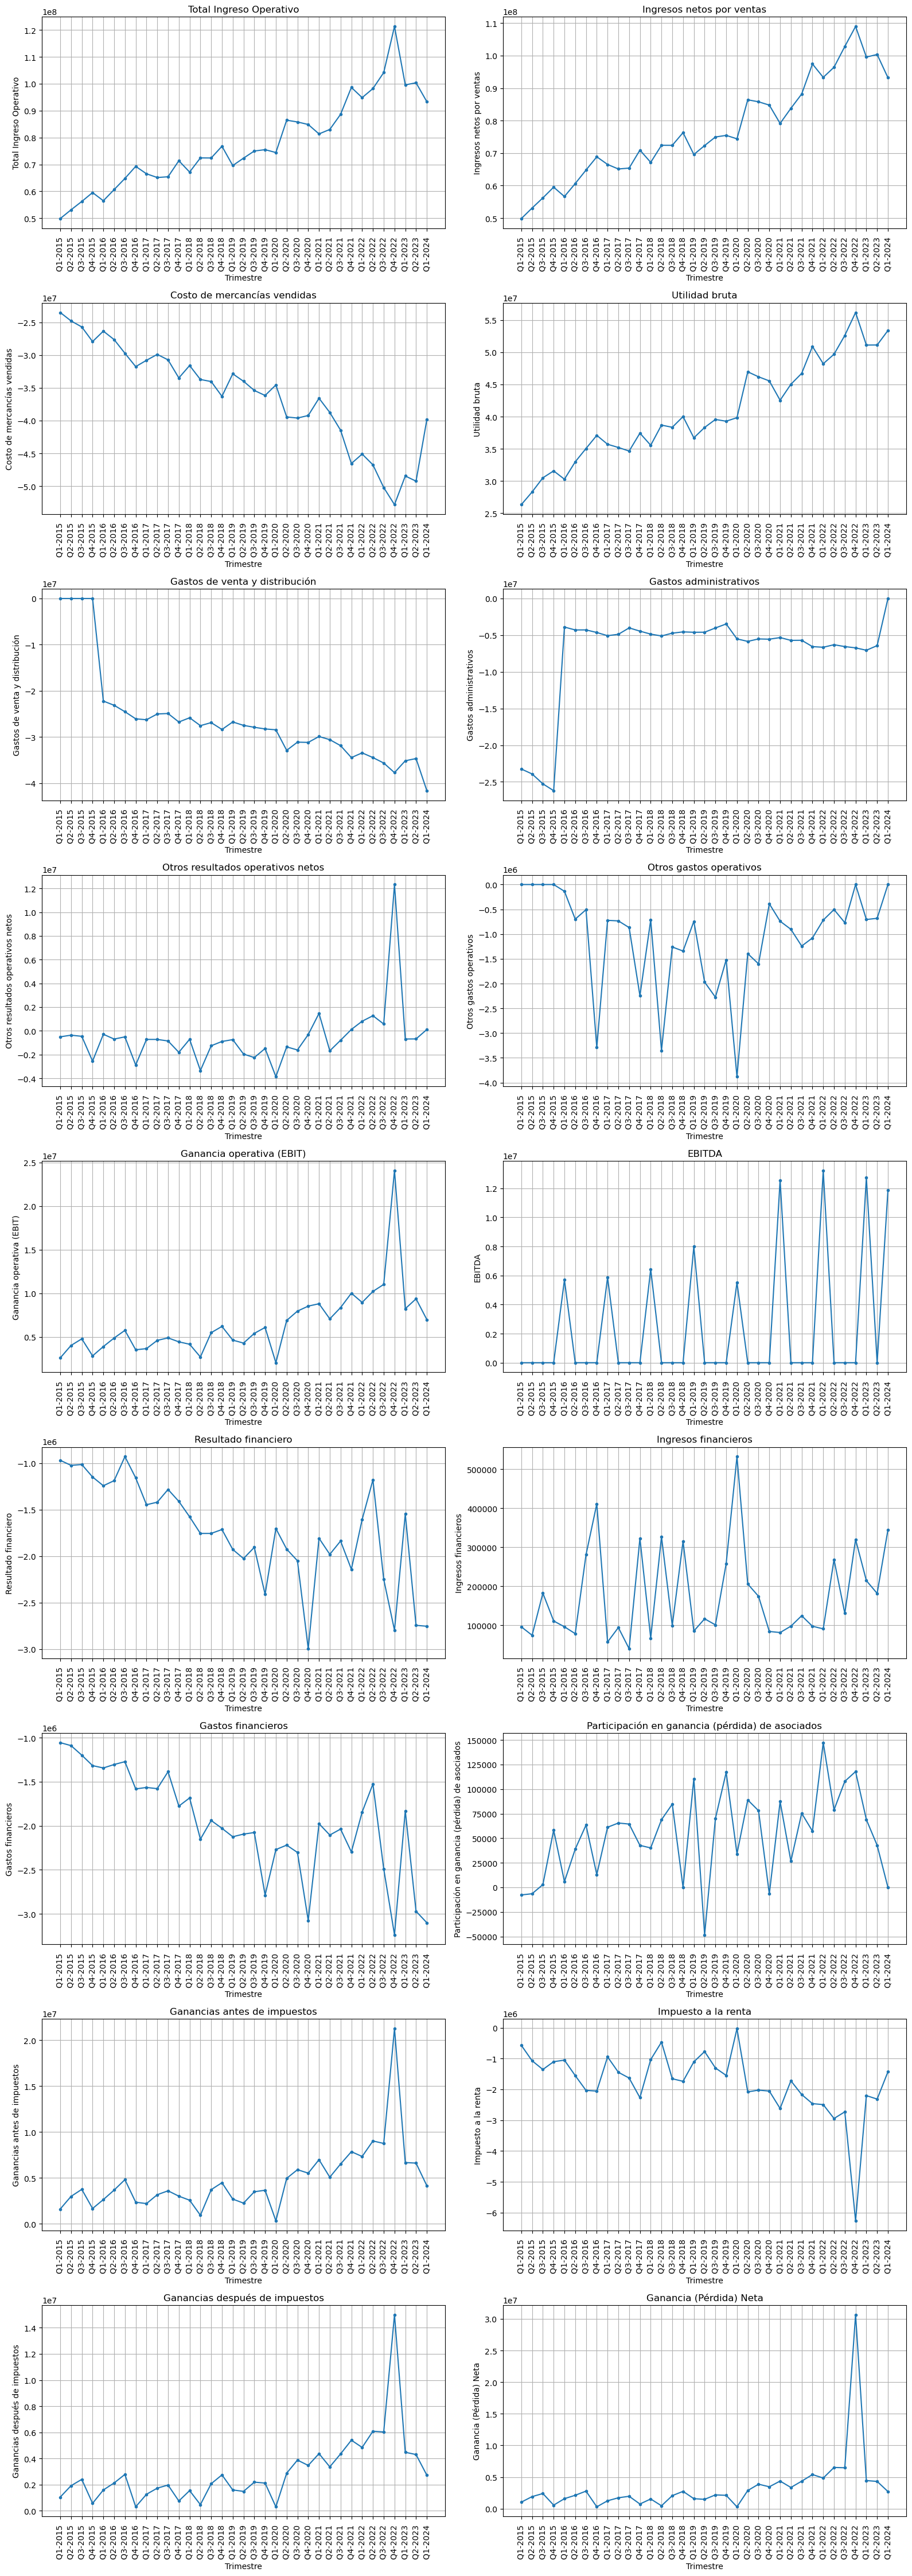

In [436]:
plot_dataframe_subplots(resultados, importantes_resultados)

## Gráficas del Balance General

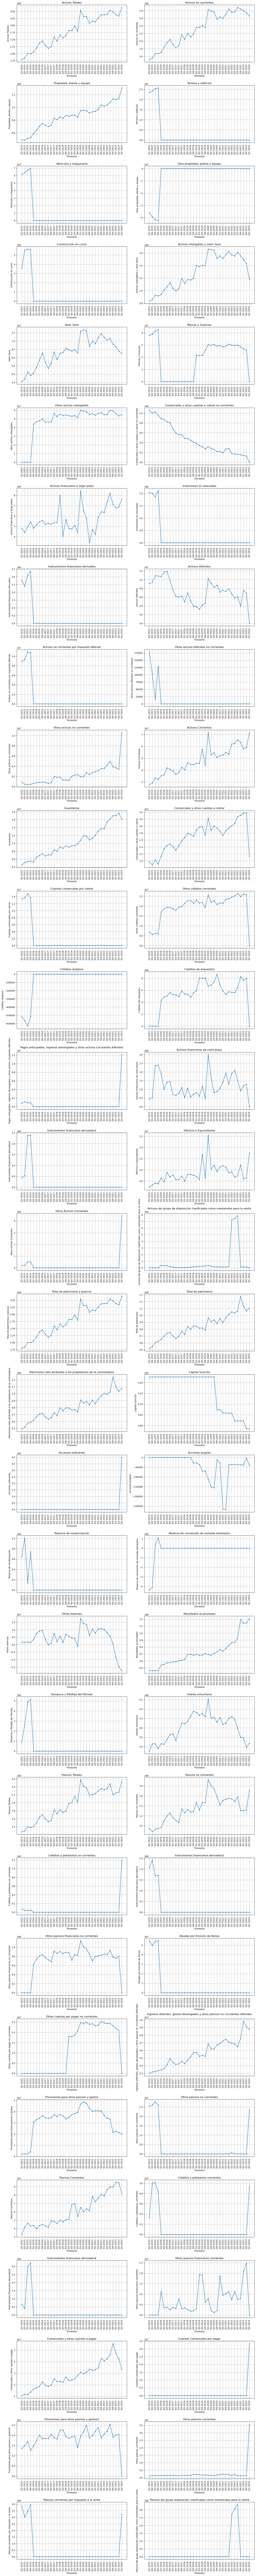

In [435]:
plot_dataframe_subplots(balance)

## Histórico de la acción de Bimbo

In [165]:
adj = get_adj_close('BIMBOA.MX', start='2015-01-01', end='2024-01-01').reset_index()
adj.set_index('Date', inplace=True)

[*********************100%%**********************]  1 of 1 completed


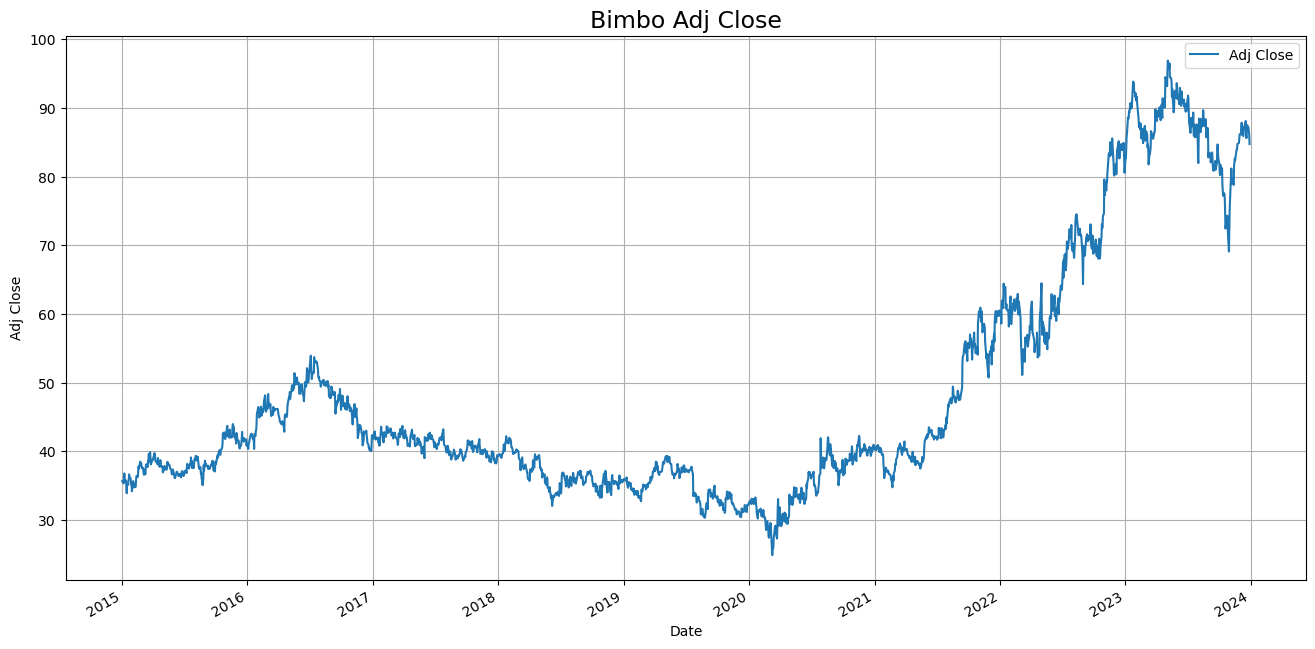

In [169]:
adj.plot(style='-',
         figsize=(16,8),
         color=color_pal[0],
         title='Bimbo',
         grid=True)
plt.title('Bimbo Adj Close', fontsize=17)
plt.ylabel('Adj Close')
plt.show()

## Merge de Adj Close con los Estados Financieros

In [440]:
resultados_for_merge = resultados.reset_index()
resultados_for_merge = resultados_for_merge.iloc[:, [-1] + list(range(resultados_for_merge.shape[1] - 1))]
resultados_for_merge = resultados_for_merge.drop(columns='Estado de Resultados')
resultados_desplazadas = resultados_for_merge.copy()
resultados_desplazadas.iloc[:, 1:] = resultados_for_merge.iloc[:, 1:].shift(1)
resultados_desplazadas.iloc[0, 1:] = None
adj_reset = adj.reset_index()
resultados_adj = pd.merge_asof(
    adj.sort_values('Date'),
    resultados_desplazadas.sort_values('Date'),
    on='Date',
    direction='backward')
resultados_adj = resultados_adj.dropna()

balance_for_merge = balance.reset_index()
balance_for_merge = balance_for_merge.iloc[:, [-1] + list(range(balance_for_merge.shape[1] - 1))]
balance_for_merge = balance_for_merge.drop(columns='Balance General')
balance_desplazadas = balance_for_merge.copy()
balance_desplazadas.iloc[:, 1:] = balance_for_merge.iloc[:, 1:].shift(1)
balance_desplazadas.iloc[0, 1:] = None
balance_adj = pd.merge_asof(
    adj.sort_values('Date'),
    balance_desplazadas.sort_values('Date'),
    on='Date',
    direction='backward')
balance_adj = balance_adj.dropna()

df_master = df_merged = pd.merge(resultados_adj, balance_adj, on=['Date', 'Adj Close'], how='inner')
df_master = df_master.set_index('Date')

In [441]:
corr_adj = corr_adj.reset_index()
corr_adj

index  Adj Close
0                                           Adj Close   1.000000
1                             Total Ingreso Operativo   0.745785
2                           Ingresos netos por ventas   0.736367
3                        Costo de mercancías vendidas  -0.763516
4                                      Utilidad bruta   0.703680
..                                                ...        ...
90                      Cuentas Comerciales por pagar        NaN
91           Provisiones para otros pasivos y gastos5   0.266239
92                           Otros pasivos corrientes  -0.293208
93         Pasivos corrientes por impuesto a la renta  -0.160305
94  Pasivos del grupo disposición clasificados com...   0.380248

[95 rows x 2 columns]

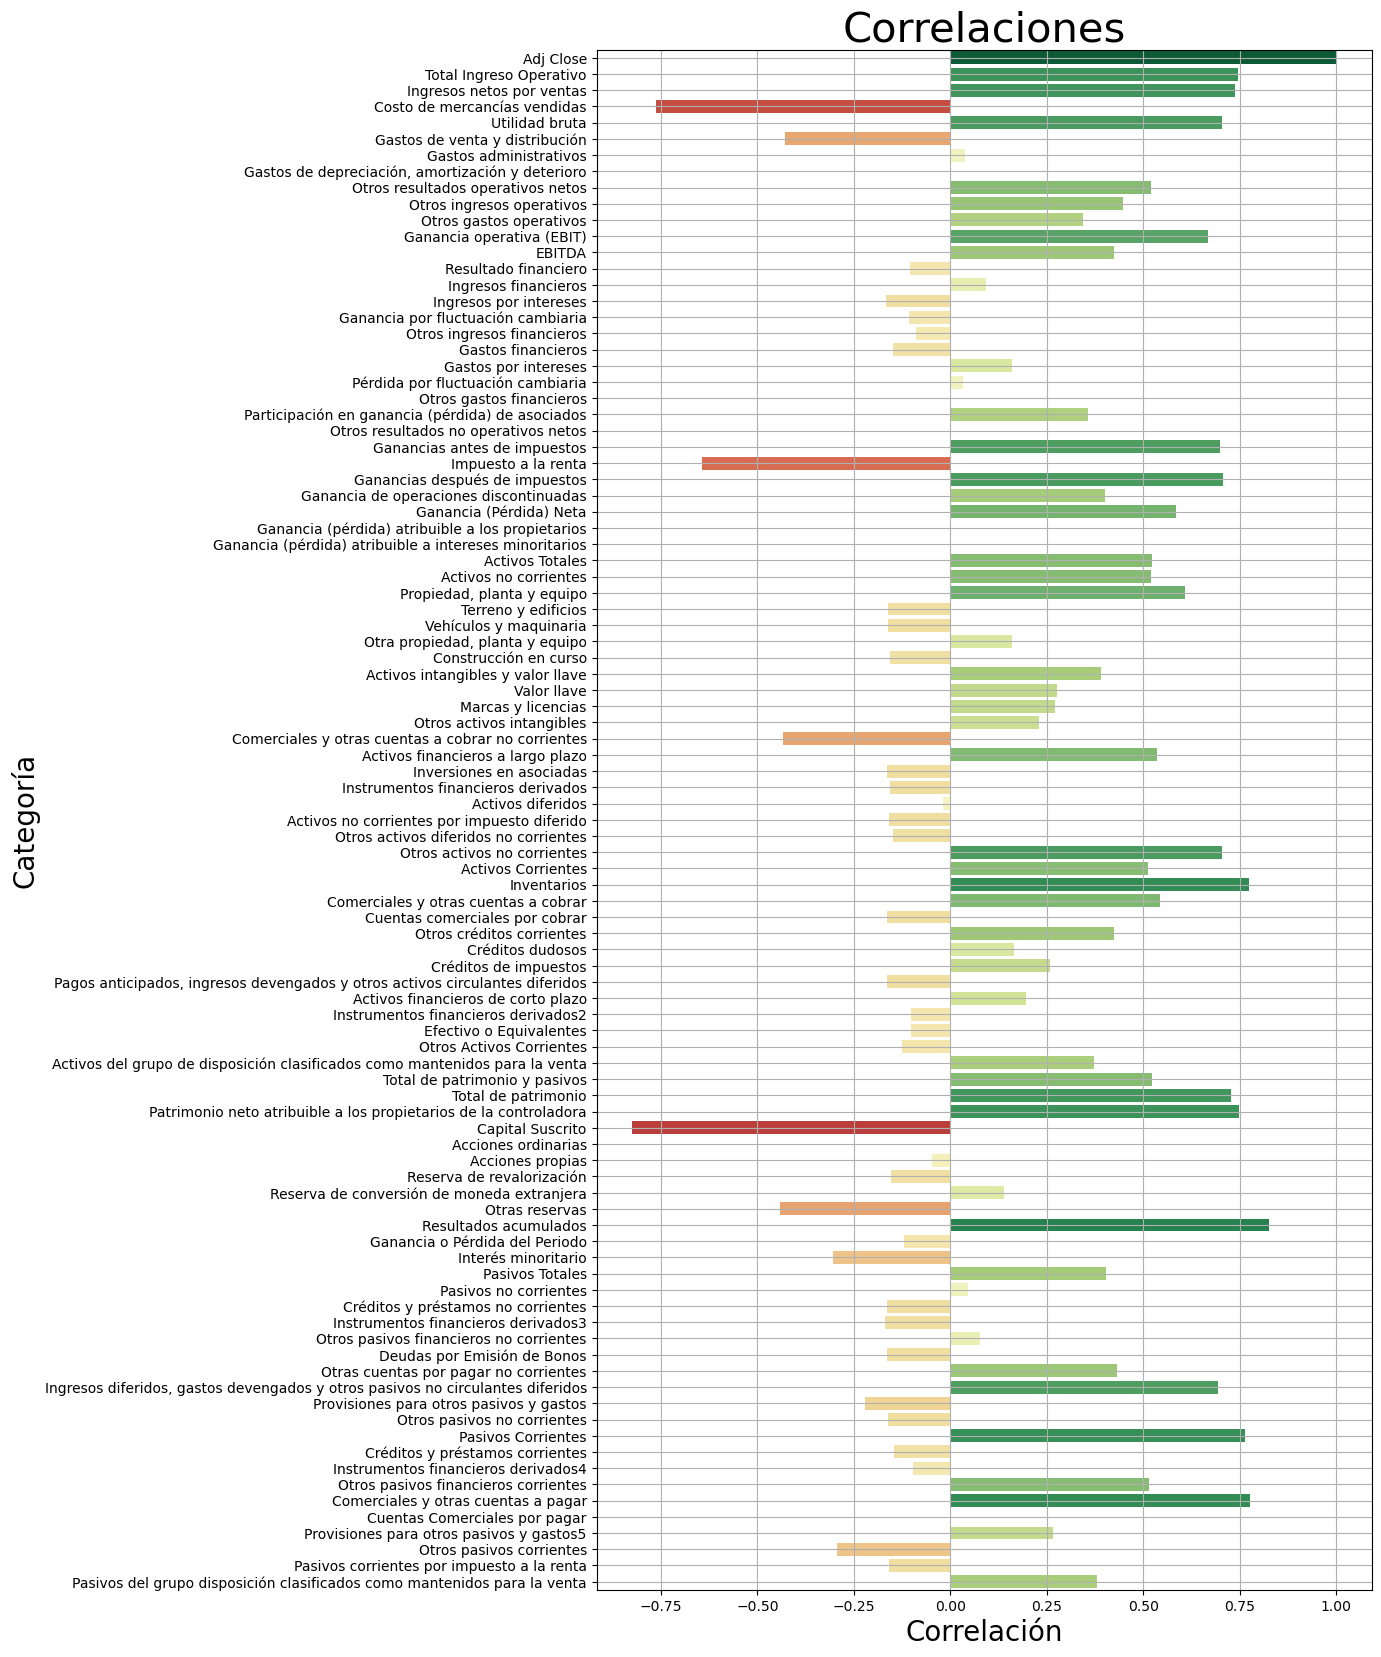

In [461]:
# Crear un gráfico de barras horizontal
plt.figure(figsize=(10,20))
colors = plt.cm.RdYlGn((np.array(corr_adj['Adj Close']) + 1) / 2)
sns.barplot(x='Adj Close', y='index', data=corr_adj, palette=colors)
plt.title('Correlaciones', fontsize=30)
plt.xlabel('Correlación', fontsize=20)
plt.ylabel('Categoría', fontsize=20)
plt.grid()
plt.show()